It is highly recommended to use a powerful **GPU**, you can use it for free uploading this notebook to [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb).
<table align="center">
 <td align="center"><a target="_blank" href="https://colab.research.google.com/github/ezponda/intro_deep_learning/blob/main/class/CNN/Visualizing_What_CNNs_Learn.ipynb">
        <img src="https://colab.research.google.com/img/colab_favicon_256px.png"  width="50" height="50" style="padding-bottom:5px;" />Run in Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/ezponda/intro_deep_learning/blob/main/class/CNN/Visualizing_What_CNNs_Learn.ipynb">
        <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png"  width="50" height="50" style="padding-bottom:5px;" />View Source on GitHub</a></td>
</table>


**Table of Contents**

1. [Introduction](#introduction)
2. [Accessing Layers and Weights in TensorFlow](#accessing_layers)
3. [Visualizing Layer Outputs](#visualizing_outputs)
4. [Methods for Interpretation](#interpretation)
    * 4.1 [Gradient-weighted Class Activation Mapping (Grad-CAM)](#gradcam)
    * 4.2 [Saliency Maps](#saliency_maps)
5. [Conclusion](#conclusion)

<a id='introduction'></a>
# Introduction

Convolutional Neural Networks (CNNs) have been successful in solving complex machine learning problems, particularly in image recognition tasks. Although they are highly effective, they are also often criticized as being black boxes since the learned representations are hard to interpret. Fortunately, we have several visualization techniques to shed some light on what's happening inside these networks.

<a id='accessing_layers'></a>
# Accessing Layers and Weights in TensorFlow


To visualize what CNNs learn, we first need to access the internal components of our CNN model, including its layers and weights. In TensorFlow, the layers of a model can be accessed using the .layers attribute and weights can be accessed using the .get_weights() method.

Here is a simple example of how you can access these components:

In [2]:
%%time
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Load the VGG16 model
model_VGG16 = VGG16()

model_VGG16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

CPU times: user 1.01 s, sys: 572 ms, total: 1.59 s
Wall time: 988 ms


In [3]:
# Accessing layers
for layer in model_VGG16.layers:
    print("Layer Name : ", layer.name)

Layer Name :  input_layer_1
Layer Name :  block1_conv1
Layer Name :  block1_conv2
Layer Name :  block1_pool
Layer Name :  block2_conv1
Layer Name :  block2_conv2
Layer Name :  block2_pool
Layer Name :  block3_conv1
Layer Name :  block3_conv2
Layer Name :  block3_conv3
Layer Name :  block3_pool
Layer Name :  block4_conv1
Layer Name :  block4_conv2
Layer Name :  block4_conv3
Layer Name :  block4_pool
Layer Name :  block5_conv1
Layer Name :  block5_conv2
Layer Name :  block5_conv3
Layer Name :  block5_pool
Layer Name :  flatten
Layer Name :  fc1
Layer Name :  fc2
Layer Name :  predictions


In [4]:
# Accessing weights of a specific layer
W, b = model_VGG16.layers[1].get_weights()
W.shape, b.shape

((3, 3, 3, 64), (64,))

<a id='visualizing_outputs'></a>
## 3. Visualizing Layer Outputs



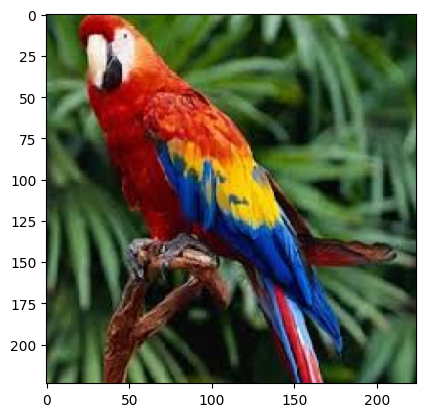

In [5]:
def read_image(image_path, target_size=None):
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = image.astype(np.uint8)
    return image


url = 'https://i.ibb.co/q5TFmqh/bird.jpg'
image_path = tf.keras.utils.get_file("bird.jpg", url)
image = read_image(image_path, target_size=(224, 224))
img = np.expand_dims(image, axis=0)
plt.imshow(image, cmap='viridis')
plt.show()

In [6]:
from tensorflow.keras.models import Model

# Get the symbolic outputs of each "key" layer (we gave them unique names).
outputs_dict = {layer.name: layer.output for layer in model_VGG16.layers}

# Set up a model that returns the activation values for every layer in
# VGG16 (as a dict).
feature_extractor = Model(inputs=model_VGG16.inputs, outputs=outputs_dict)

In [7]:
%%time
## Get the features of the image
features = feature_extractor(img)
print(features.keys())

dict_keys(['input_layer_1', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool', 'flatten', 'fc1', 'fc2', 'predictions'])
CPU times: user 509 ms, sys: 70.4 ms, total: 579 ms
Wall time: 82.1 ms


/Users/pabloruizruiz/UCM_Clases/intro_deep_learning/.venv/lib/python3.11/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


feature_maps first hidden layer shape:  (1, 224, 224, 64)


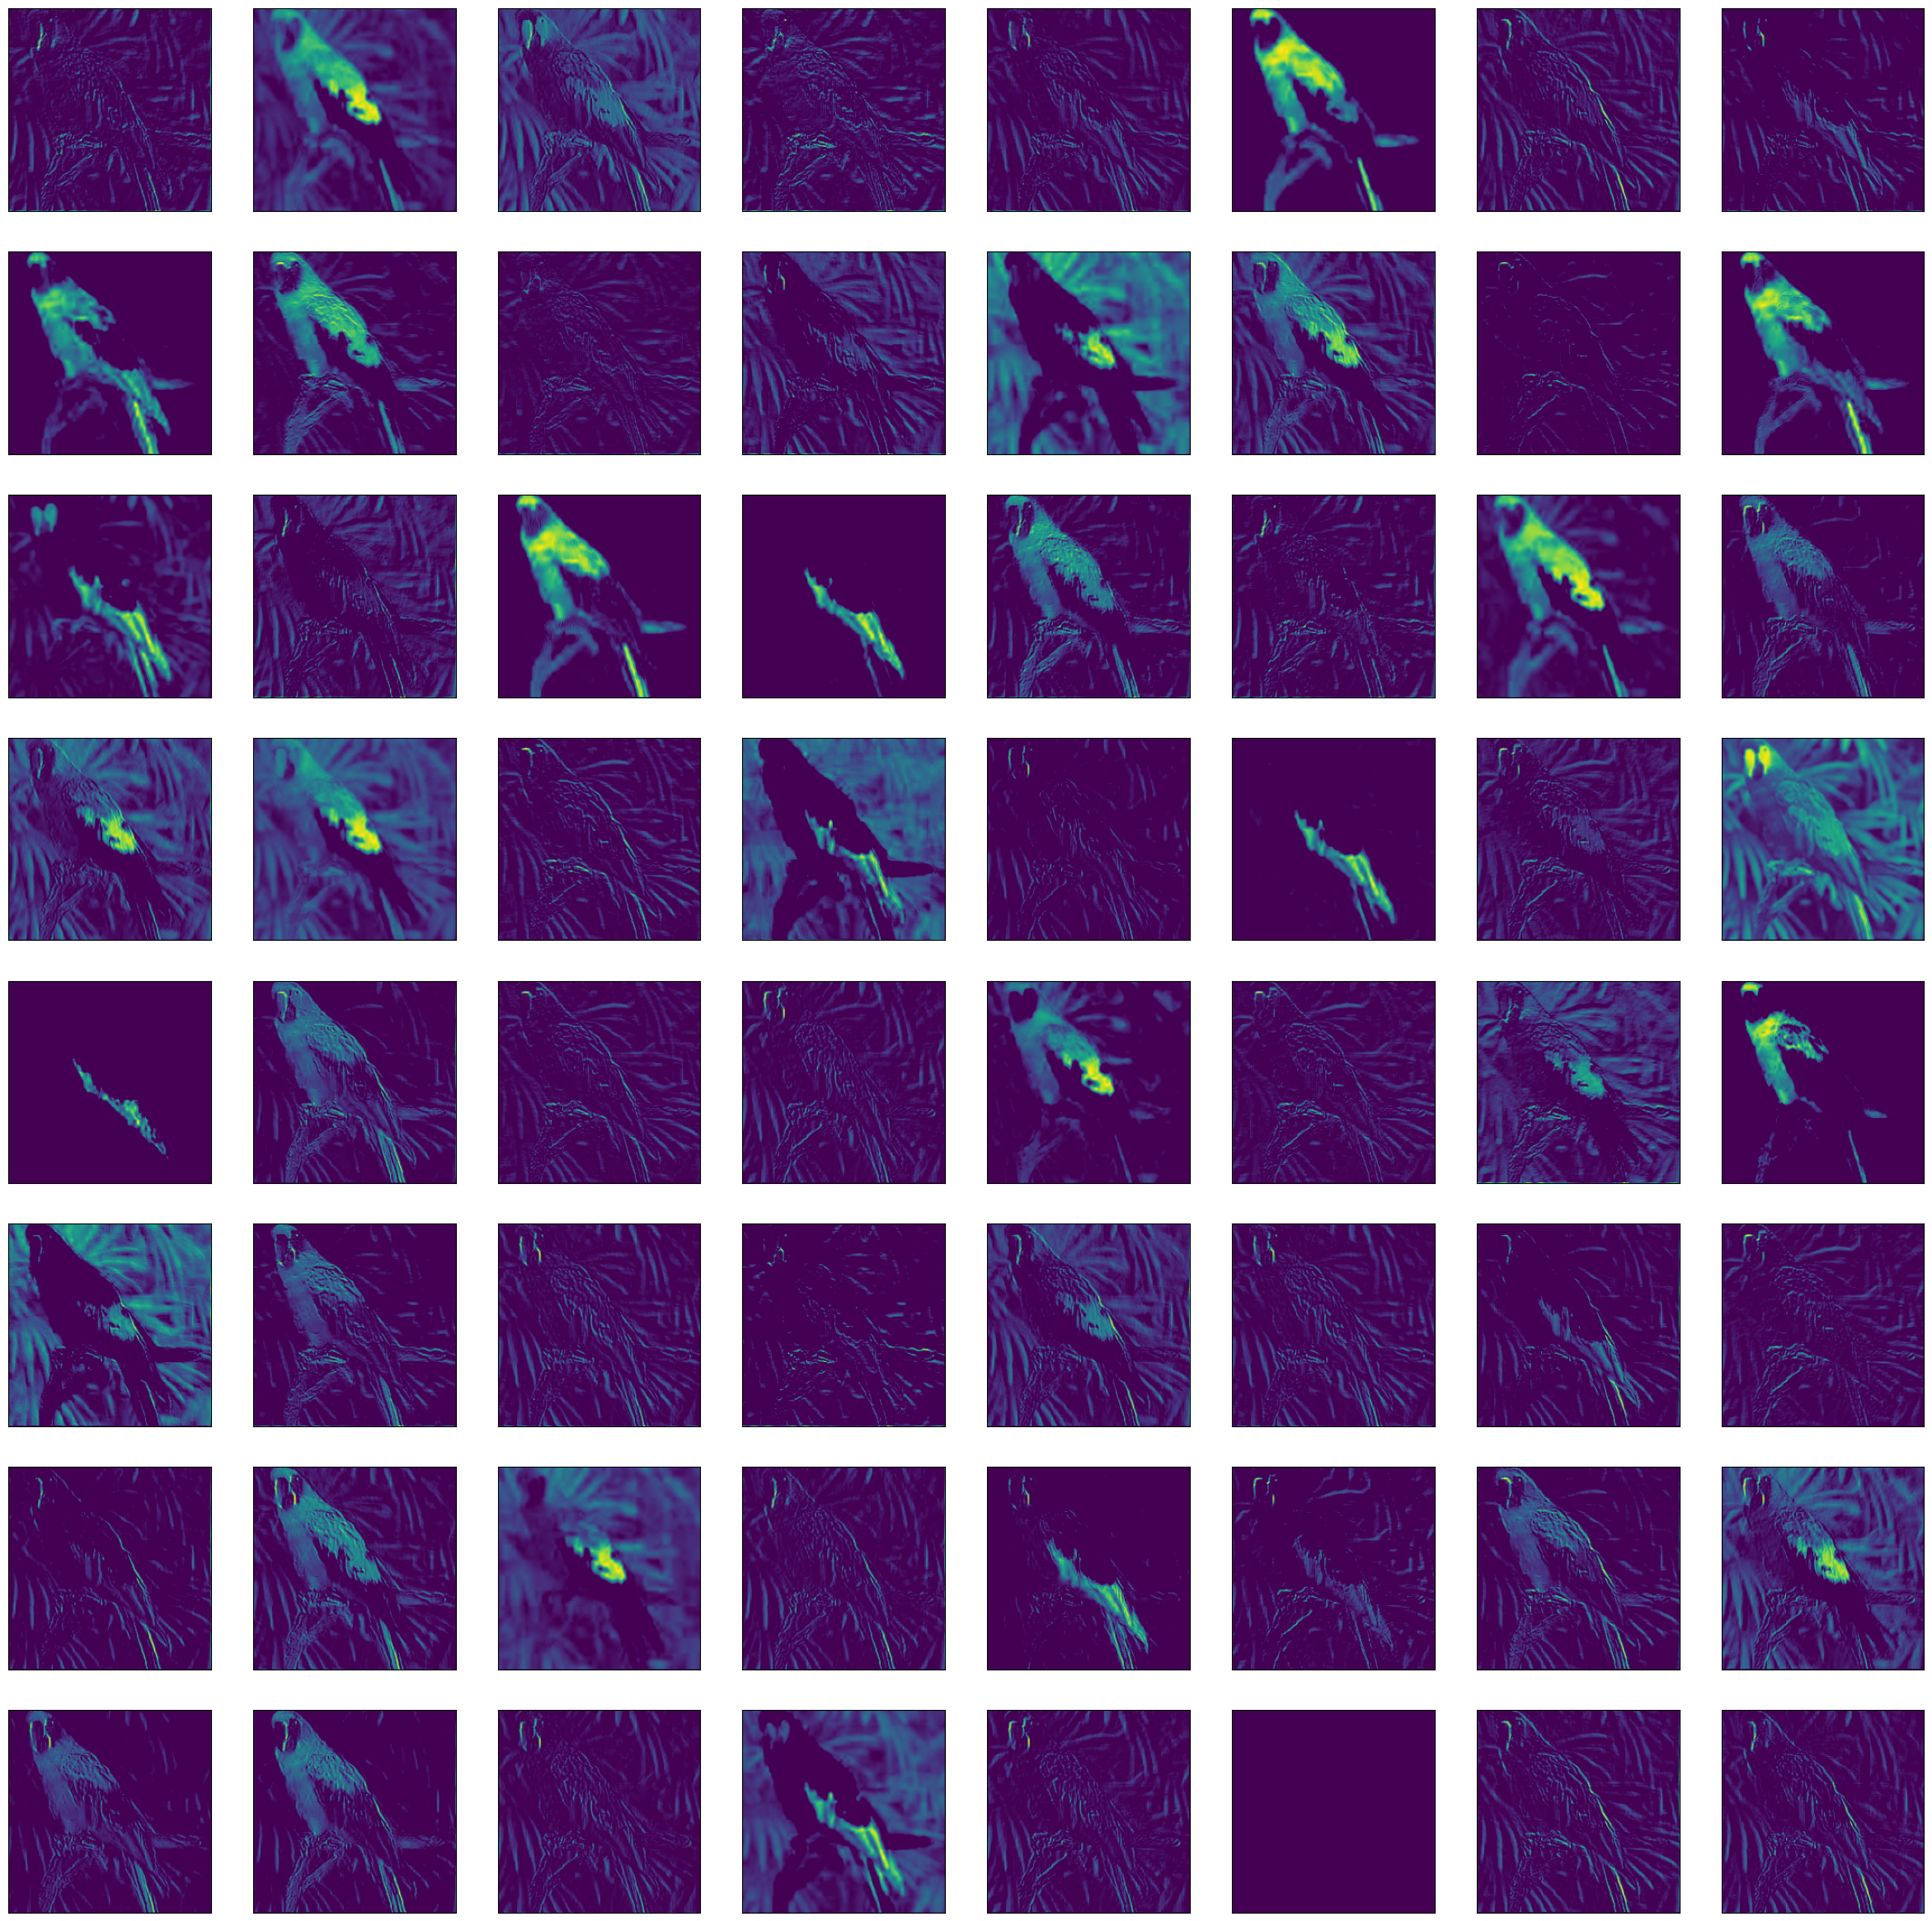

In [8]:
# get feature map for first hidden layer
feature_maps = features['block1_conv1']
print('feature_maps first hidden layer shape: ', feature_maps.shape)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
plt.figure(figsize=(30, 30))
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in viridis or gray
        plt.imshow(feature_maps[0, :, :, ix - 1], cmap='viridis')
        ix += 1
# show the figure
plt.show()

In [9]:
# feature_maps = features['block1_conv2'] 
# print('feature_maps shape: ', feature_maps.shape)
# for i in range(feature_maps.shape[-1]):
#     plt.xticks([])
#     plt.yticks([])
#     plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
#     plt.show()

feature_maps shape:  (1, 112, 112, 64)


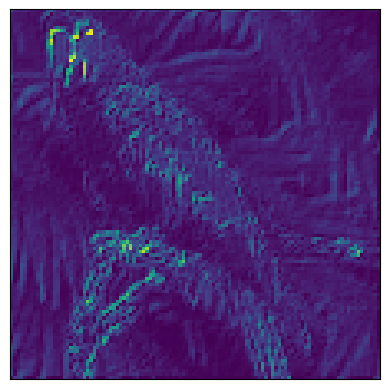

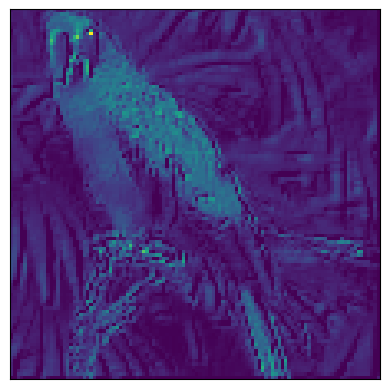

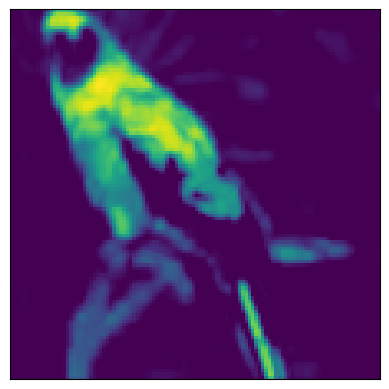

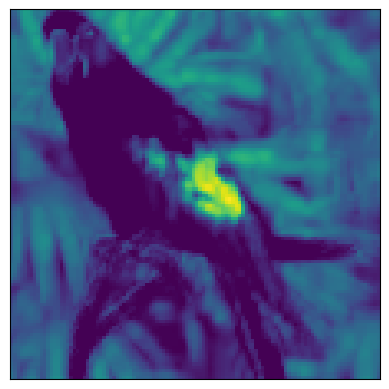

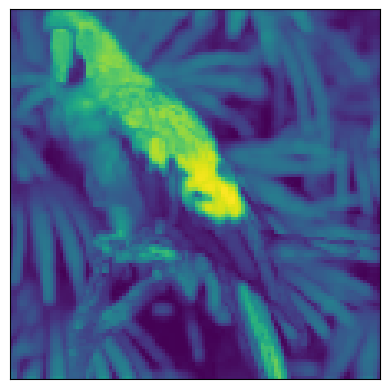

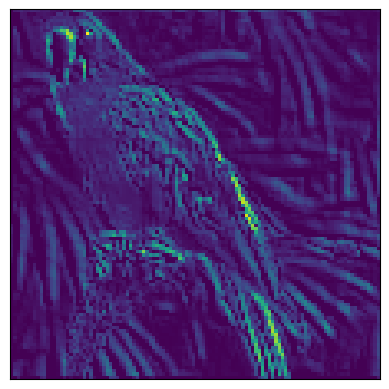

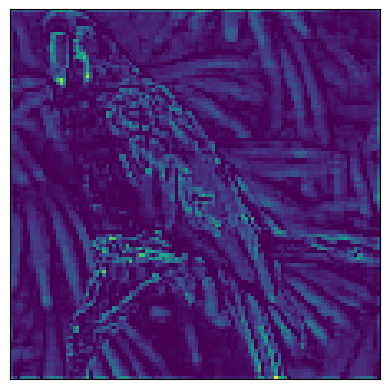

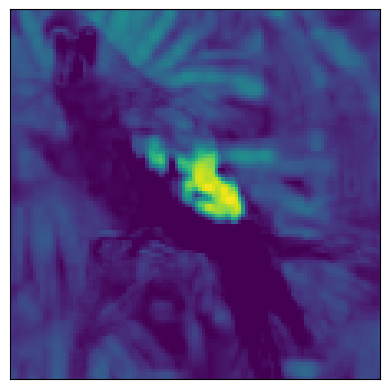

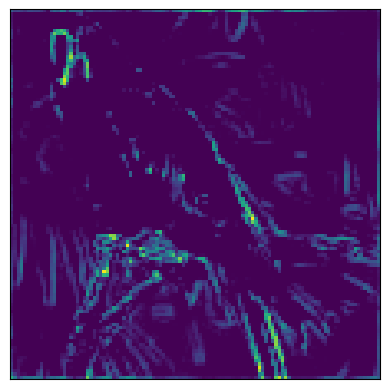

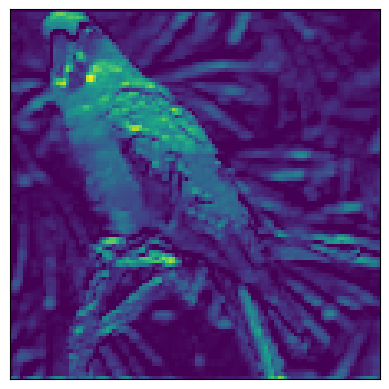

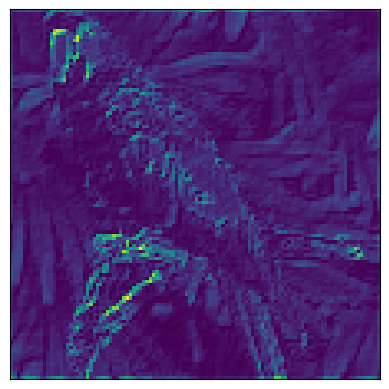

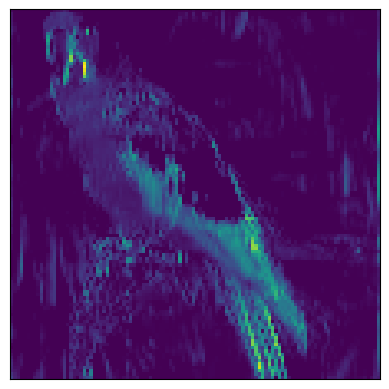

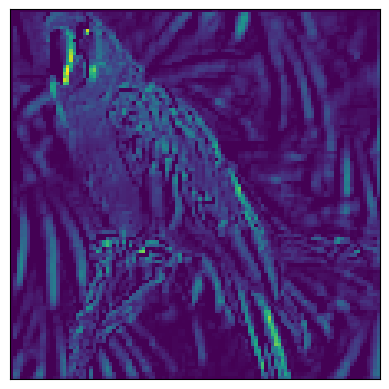

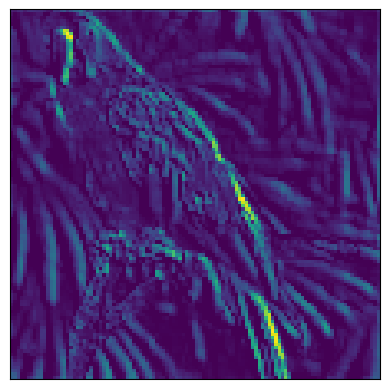

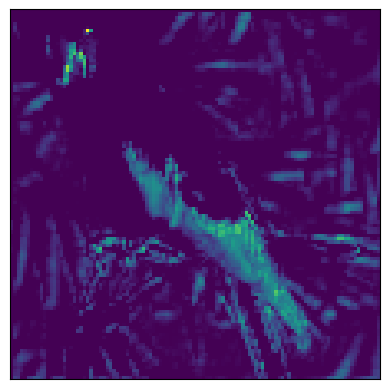

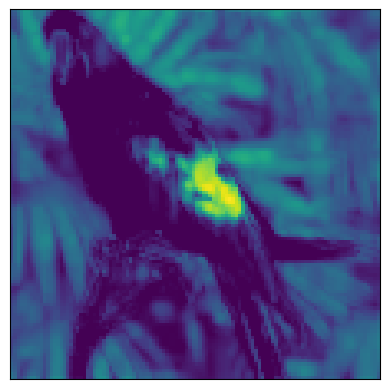

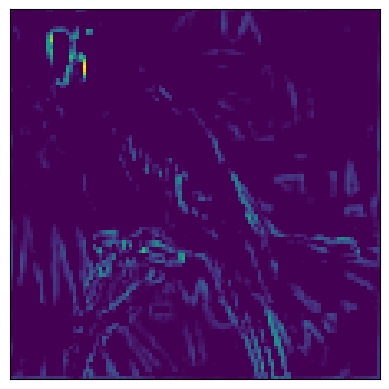

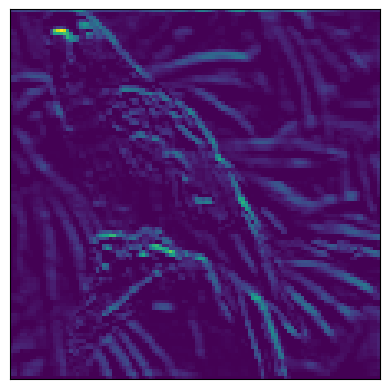

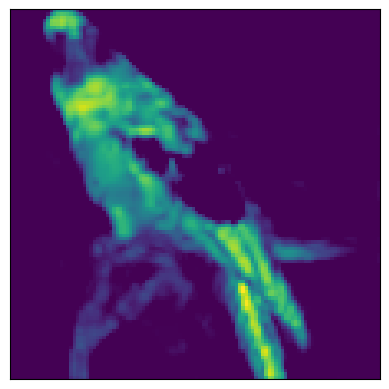

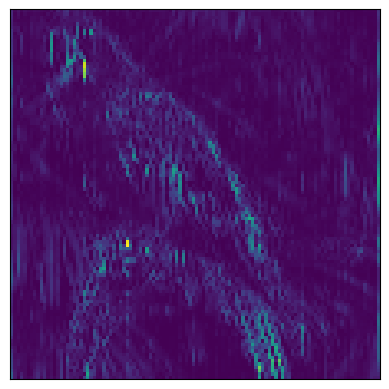

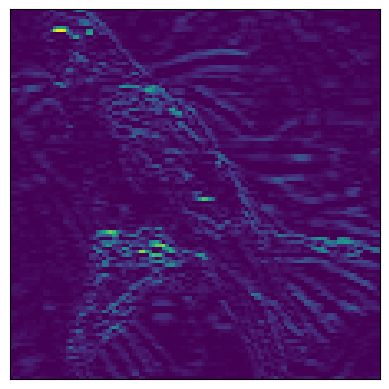

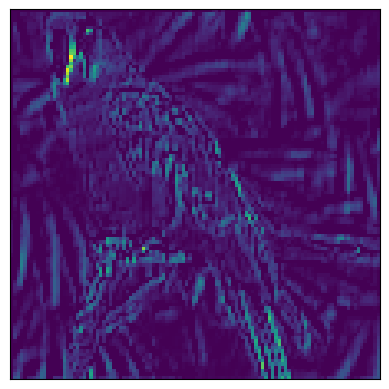

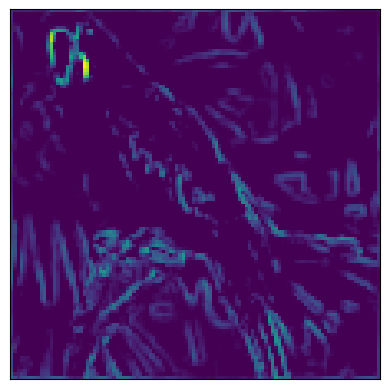

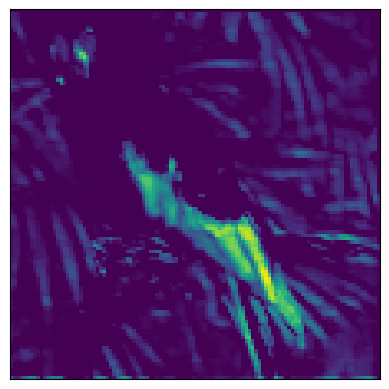

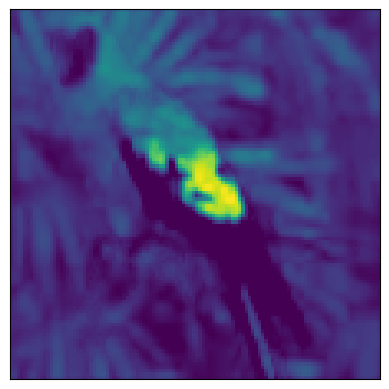

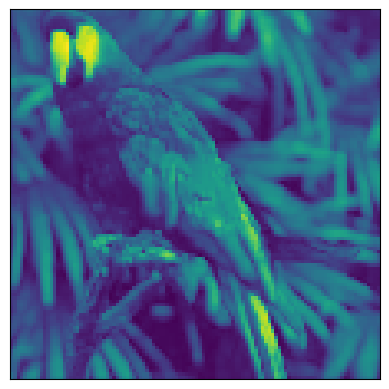

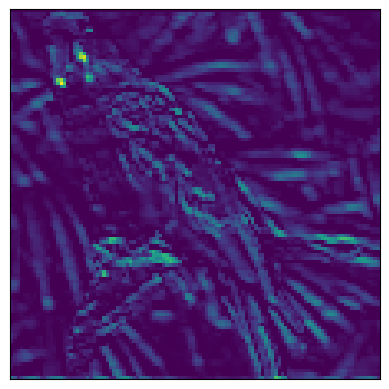

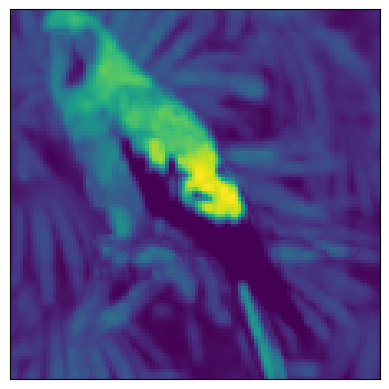

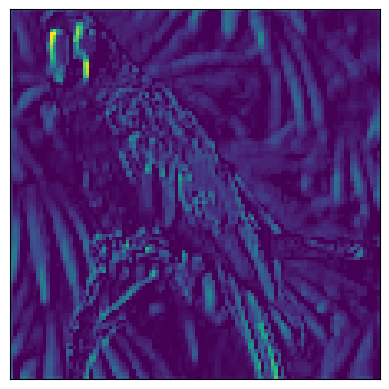

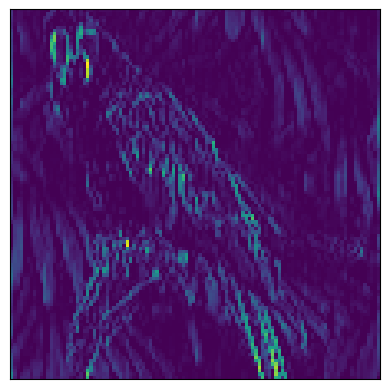

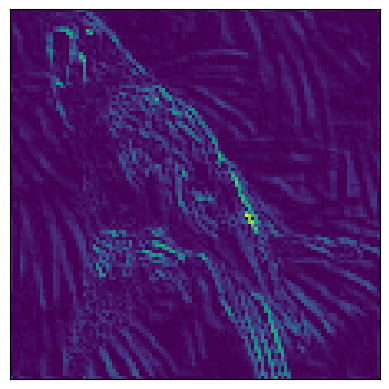

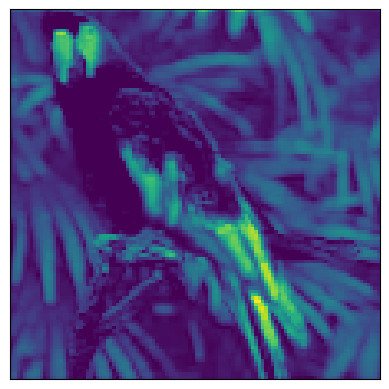

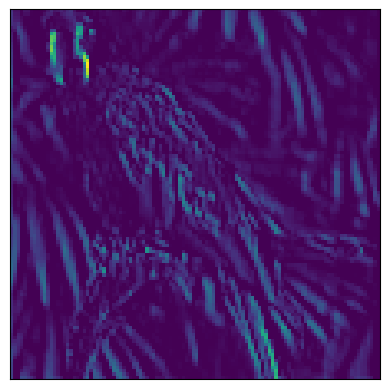

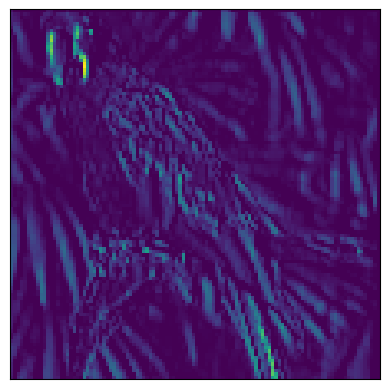

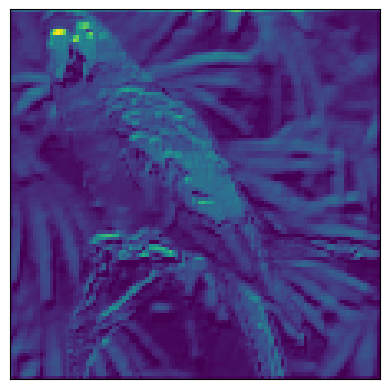

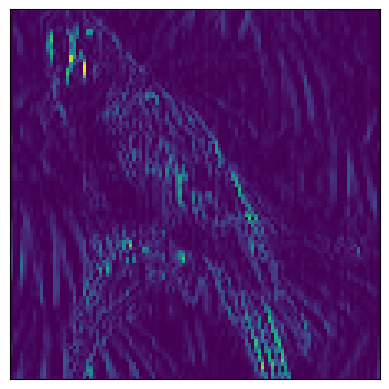

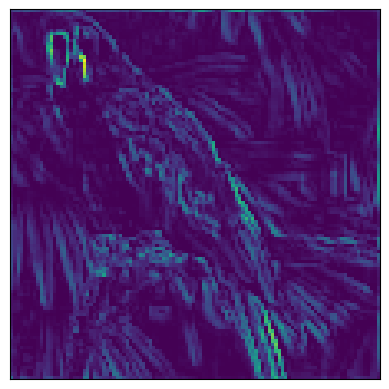

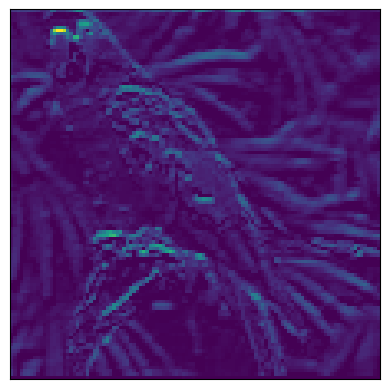

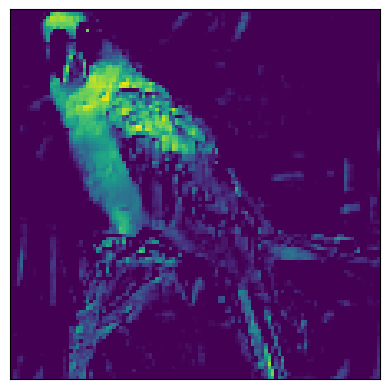

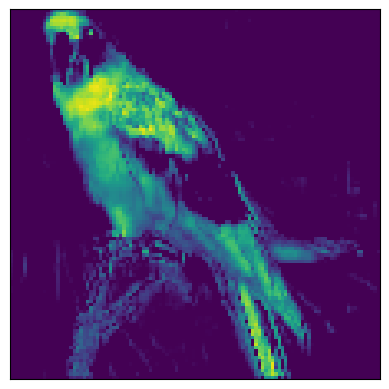

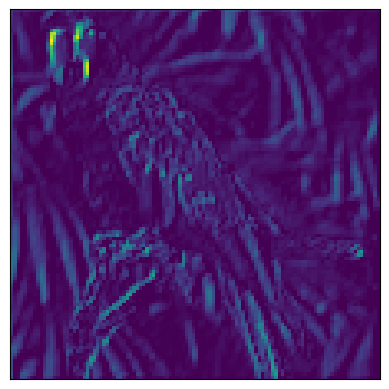

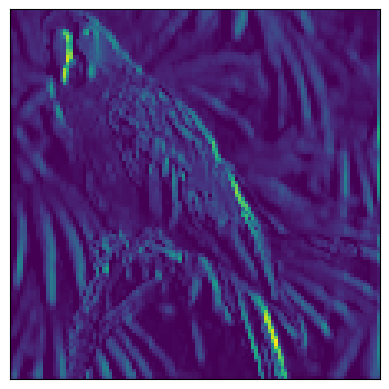

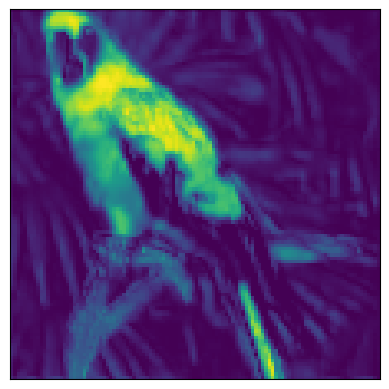

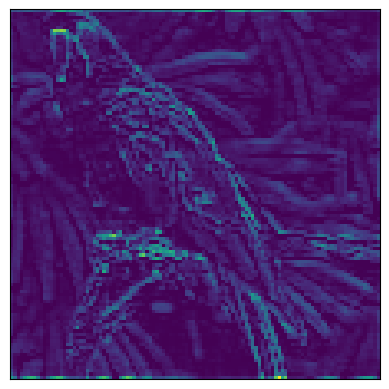

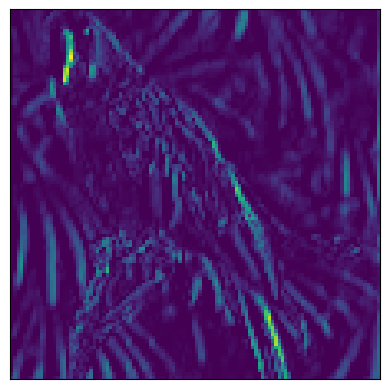

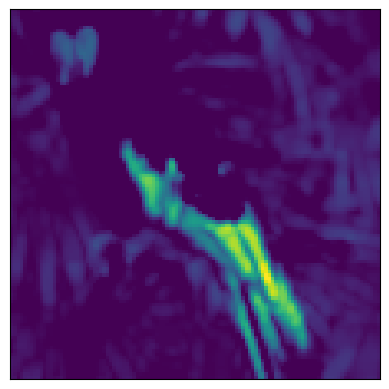

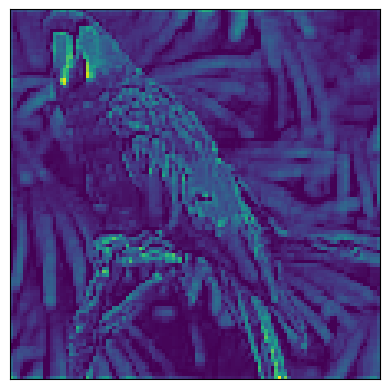

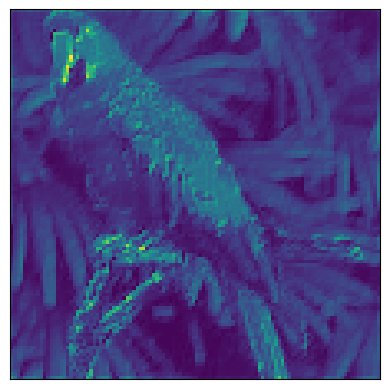

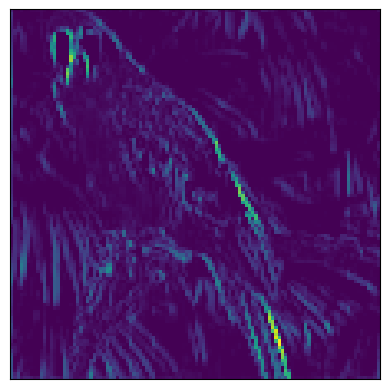

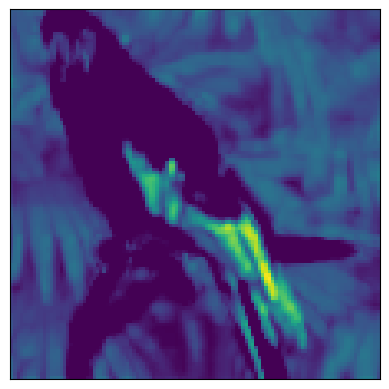

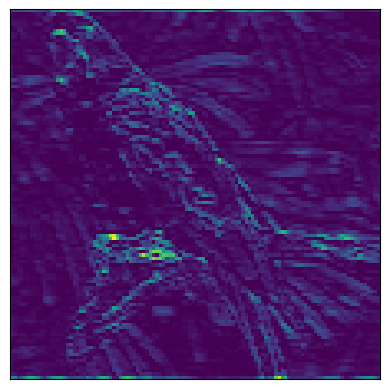

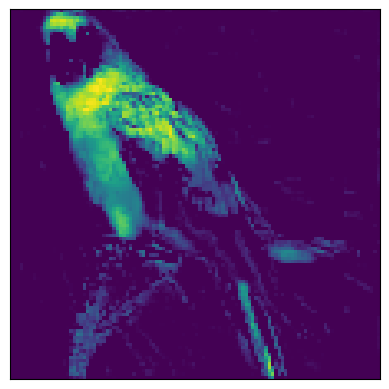

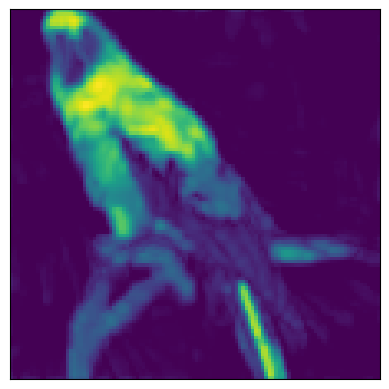

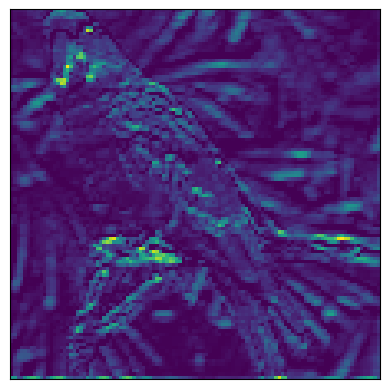

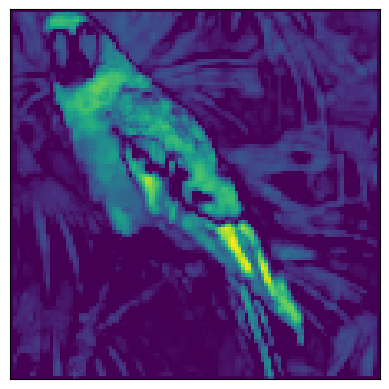

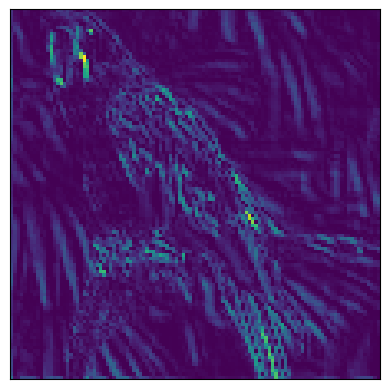

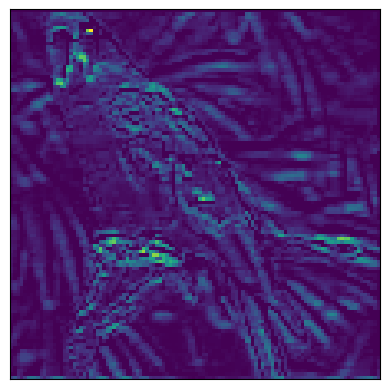

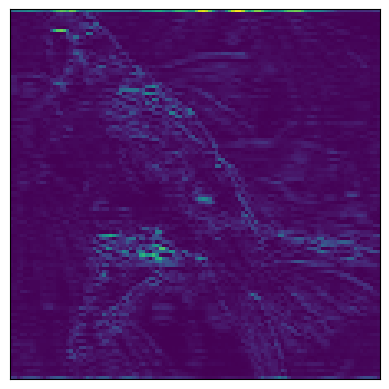

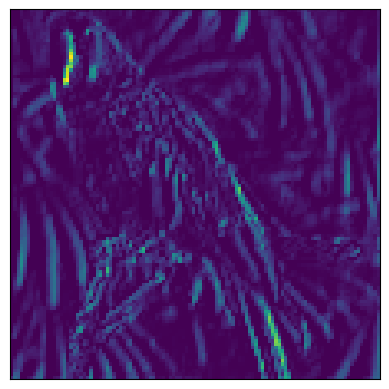

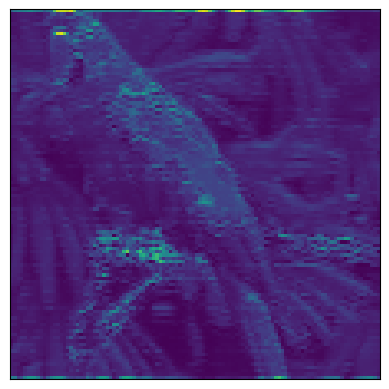

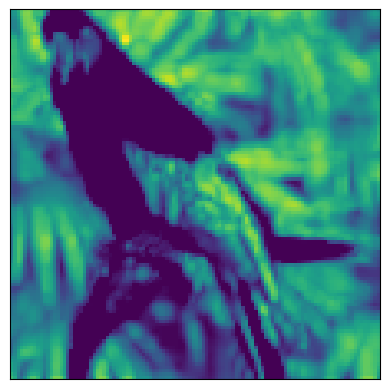

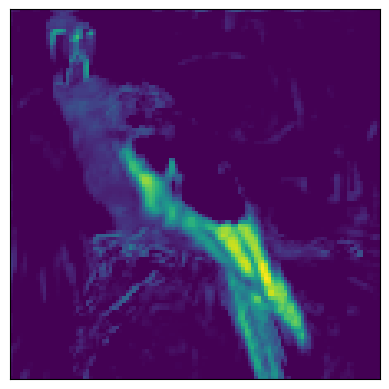

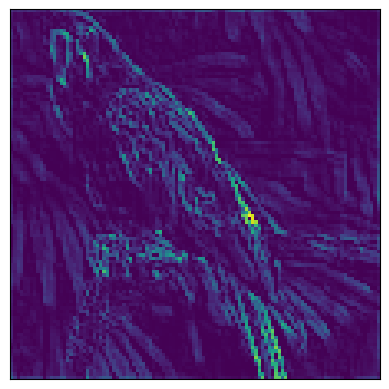

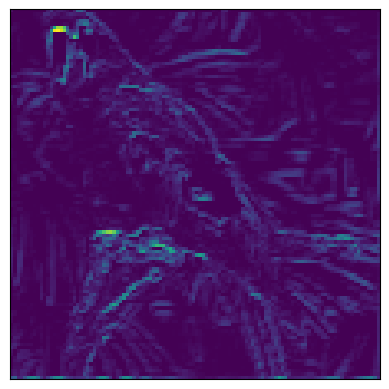

In [10]:
feature_maps = features['block1_pool'] 
print('feature_maps shape: ', feature_maps.shape)
for i in range(feature_maps.shape[-1]):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.show()

<a id='interpretation'></a>
# Methods for Interpretation

There are several methods for interpreting the results from CNNs. We will look into two popular ones: Grad-CAM and Saliency Maps.

<a id='imagenet'></a>
## imagenet 

ImageNet is a large dataset of over 14 million labeled images spanning 20,000+ categories. The images were collected from the internet and labeled by human annotators using Amazon's Mechanical Turk crowdsourcing tool.

For the purpose of this tutorial, the ImageNet dataset is particularly relevant because the model we're using (VGG16) was trained on ImageNet. The dataset consists of 1000 different classes, and thus, the model is capable of recognizing 1000 different types of objects.

The ImageNet class index file we download is a dictionary that maps the class indices, which are the output of the model's prediction, to human-readable labels. When we visualize the Grad-CAM heatmaps, we use these labels to understand what the model is recognizing. This is why we need the ImageNet class index in this tutorial.


In [11]:
import json
import requests

# URL of the ImageNet class index
url = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'

# Send a HTTP request to the URL
response = requests.get(url)
print(response.status_code)
# If the request is successful, the status code will be 200
if response.status_code == 200:
    # Get the content of the response
    content = response.content

    # Save the json content into a dictionary
    CLASS_INDEX = json.loads(content)

    # Save the dictionary into a local file so you don't have to download it every time
    with open('imagenet_class_index.json', 'w') as f:
        json.dump(CLASS_INDEX, f)

    # Let's test it:
    print(CLASS_INDEX[str(282)])  # it should print ['n02123045', 'tabby'] (a kind of cat)

else:
    print("Failed to download the file. Status code:", response.status_code)


200
['n02123159', 'tiger_cat']


In [12]:
# Transform CLASS_INDEX to class_name:index
class2index = {value[1]: int(key) for key, value in CLASS_INDEX.items()}

# Let's test it:
class2index

{'tench': 0,
 'goldfish': 1,
 'great_white_shark': 2,
 'tiger_shark': 3,
 'hammerhead': 4,
 'electric_ray': 5,
 'stingray': 6,
 'cock': 7,
 'hen': 8,
 'ostrich': 9,
 'brambling': 10,
 'goldfinch': 11,
 'house_finch': 12,
 'junco': 13,
 'indigo_bunting': 14,
 'robin': 15,
 'bulbul': 16,
 'jay': 17,
 'magpie': 18,
 'chickadee': 19,
 'water_ouzel': 20,
 'kite': 21,
 'bald_eagle': 22,
 'vulture': 23,
 'great_grey_owl': 24,
 'European_fire_salamander': 25,
 'common_newt': 26,
 'eft': 27,
 'spotted_salamander': 28,
 'axolotl': 29,
 'bullfrog': 30,
 'tree_frog': 31,
 'tailed_frog': 32,
 'loggerhead': 33,
 'leatherback_turtle': 34,
 'mud_turtle': 35,
 'terrapin': 36,
 'box_turtle': 37,
 'banded_gecko': 38,
 'common_iguana': 39,
 'American_chameleon': 40,
 'whiptail': 41,
 'agama': 42,
 'frilled_lizard': 43,
 'alligator_lizard': 44,
 'Gila_monster': 45,
 'green_lizard': 46,
 'African_chameleon': 47,
 'Komodo_dragon': 48,
 'African_crocodile': 49,
 'American_alligator': 50,
 'triceratops': 51,
 


<a id='gradcam'></a>
## Gradient-weighted Class Activation Mapping (Grad-CAM)

Grad-CAM uses the gradients of any target concept flowing into the final convolutional layer to produce a coarse localization map of the important regions in the image. It combines the strengths of the gradient-based localization and class activation mapping to achieve

 better performance.

The computation of Grad-CAM can be outlined as follows:

1. Given an image, forward propagate it through the model to obtain the raw class scores before softmax.
2. Compute the gradients of the class score with respect to feature maps of the final convolutional layer.
3. Global average pool the gradients over the width and height dimensions to obtain the neuron importance weights.
4. The weighted combination of forward activation maps is then followed by a ReLU.

Mathematically, Grad-CAM can be expressed as:

Let $A^k$ be the activation maps and $y^c$ be the class score. The importance weights $\alpha^c_k$ are calculated as:

$$\alpha^c_k = \frac{1}{Z} \sum_i \sum_j \frac{\partial y^c}{\partial A^k_{ij}}$$

where $Z$ is the total number of pixels in each feature map. The localization map $L^c_{Grad-CAM}$ is then obtained as:

$$L^c_{Grad-CAM} = ReLU(\sum_k \alpha^c_k A^k)$$

Example with tf-keras-vis:

In [34]:
#!pip install tf-keras-vis

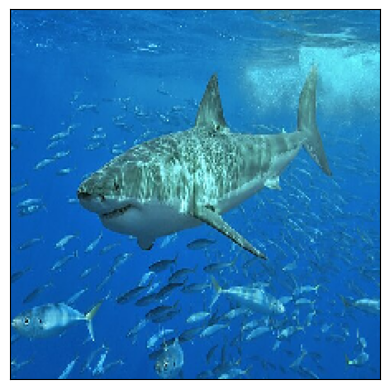

In [35]:
# great_white_shark image
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/White_shark.jpg/480px-White_shark.jpg'
image_path = tf.keras.utils.get_file("great_white_shark2.jpg", url)
image = read_image(image_path, target_size=(224, 224))
img = np.expand_dims(image, axis=0)
plt.imshow(image, cmap='viridis')
plt.xticks([])
plt.yticks([])
plt.show()

In [36]:
X = preprocess_input(img)

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

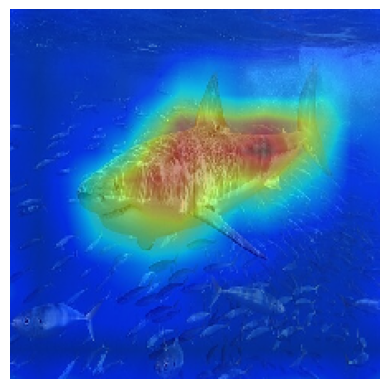

In [37]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore

categorical_index = class2index['great_white_shark']

# Create GradCAM++ object
gradcam = GradcamPlusPlus(model_VGG16,
                          model_modifier=ReplaceToLinear(),
                          clone=True)

# Generate cam with GradCAM++
cam = gradcam(CategoricalScore(categorical_index),X,
              penultimate_layer=-1)

# Plot the CAM
plt.imshow(image)
heatmap = np.uint8(cm.jet(cam[0])[..., :3] * 255)
plt.imshow(heatmap, cmap='jet', alpha=0.5) # overlay
plt.axis('off')

## Saliency Maps
Saliency maps are a technique used to visualize the regions of an image that are most important for a model's prediction.   
They are computed by taking the gradient of the output with respect to the input image. The higher the gradient, the more important that pixel is for the model's decision.

In [26]:
import tensorflow as tf
from tf_keras_vis.utils import normalize
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils.scores import CategoricalScore
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear


In [29]:
# #loading the image and converting it to numpy array
# img = tf.keras.preprocessing.image.load_img('images/test/dog/'+ random.sample(os.listdir(testing_dog), 1)[0],target_size=(300,300))
x = tf.keras.preprocessing.image.img_to_array(image)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)


# Load pretrained model
model = VGG16(weights='imagenet', include_top=True)
# swap last layer with linear layer
model_VGG16.layers[-1].activation = tf.keras.activations.linear

score = CategoricalScore([0])
model_modifier = ReplaceToLinear()

#Create Saliency object
saliency = Saliency(model, model_modifier=model_modifier, clone=False)

/Users/pabloruizruiz/UCM_Clases/intro_deep_learning/.venv/lib/python3.11/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_68
Received: inputs=['Tensor(shape=(1, 224, 224, 3))']
  warnings.warn(msg)


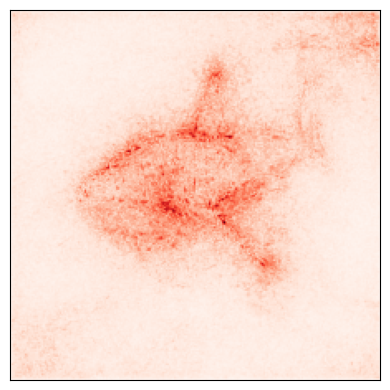

In [30]:
subplot_args = {
   'nrows': 1,
   'ncols': 1,
   'figsize': (5, 4),
   'subplot_kw': {'xticks': [], 'yticks': []}
}

# Generate saliency map
saliency_map = saliency(score, x, smooth_samples=20, smooth_noise=0.2)
saliency_map = normalize(saliency_map)

f, ax = plt.subplots(**subplot_args)
ax.imshow(saliency_map[0], cmap='Reds')
plt.tight_layout()
plt.show()